In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix ,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_json('players_stats.json')
df = pd.DataFrame(data)
df = df.drop(columns=['total_penalty','total_clean_sheets','total_second_yellow_card'])
le = LabelEncoder()
df['pos'] = le.fit_transform(df['pos'])
idx2label = dict(zip(le.transform(le.classes_), le.classes_))
print(idx2label)
train_data , test_data = train_test_split(df,test_size=0.2,random_state=103)
test_data , valid_data = train_test_split(test_data,test_size=0.5,random_state=102)

{0: 'ATT', 1: 'DEF', 2: 'GK', 3: 'MID'}


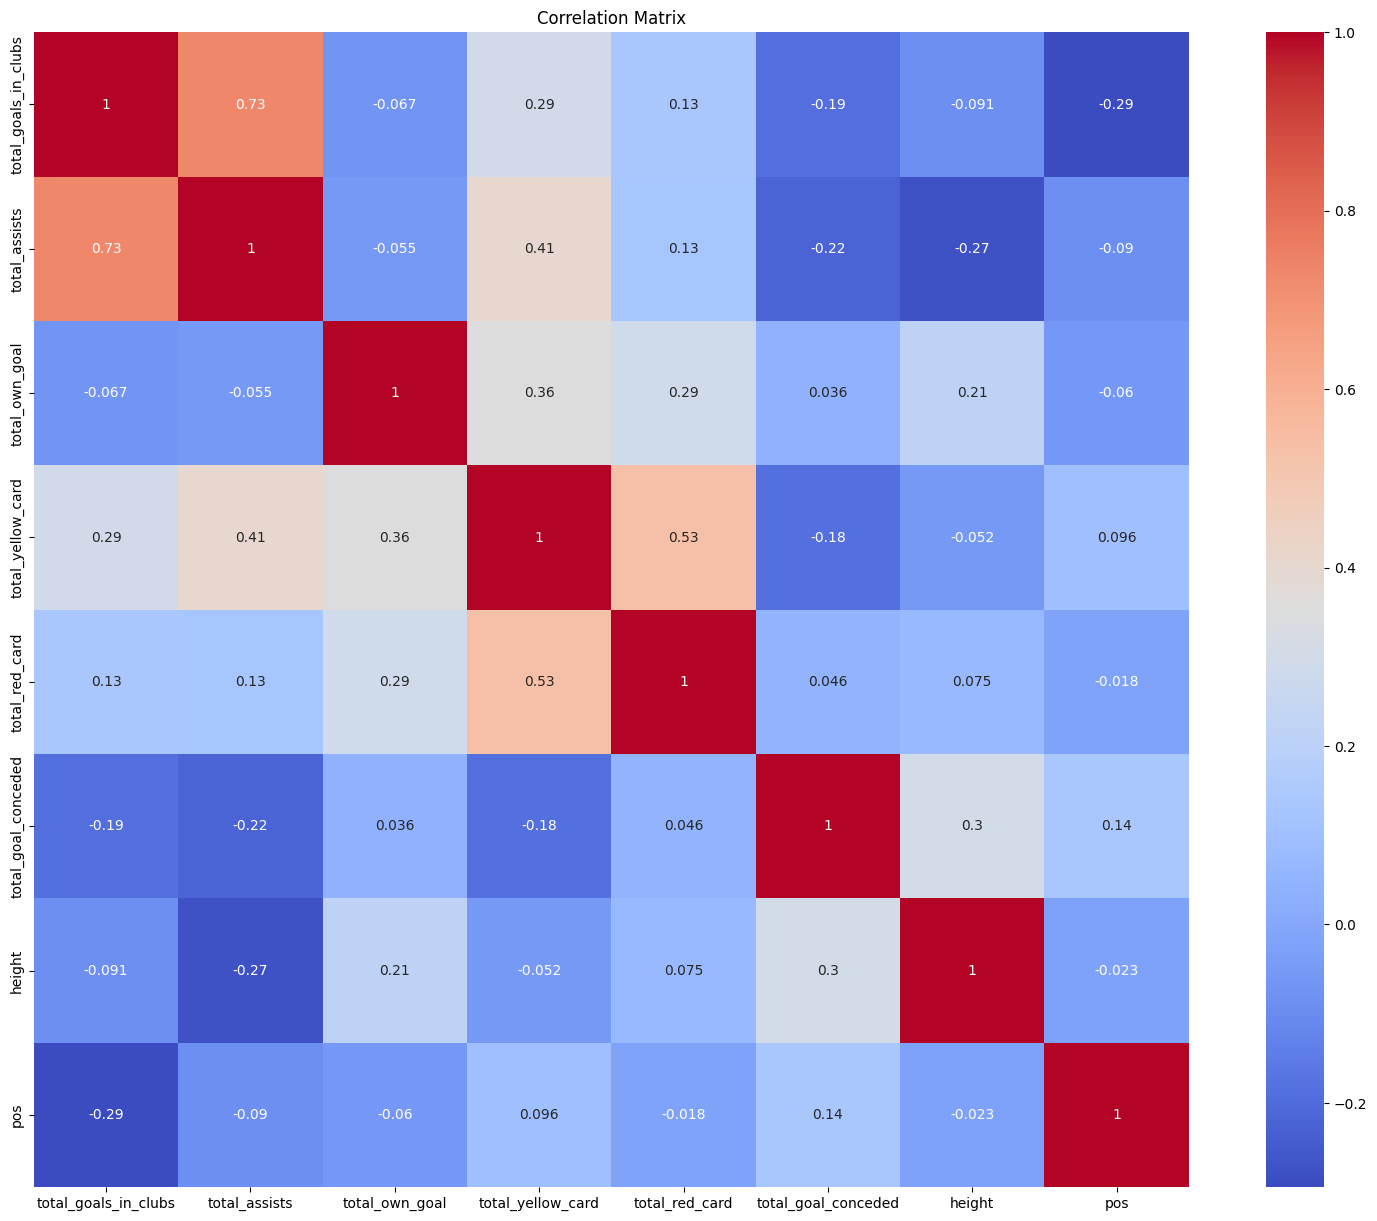

In [3]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [4]:
df.columns

Index(['total_goals_in_clubs', 'total_assists', 'total_own_goal',
       'total_yellow_card', 'total_red_card', 'total_goal_conceded', 'height',
       'pos'],
      dtype='object')

Text(0.5, 1.0, 'height')

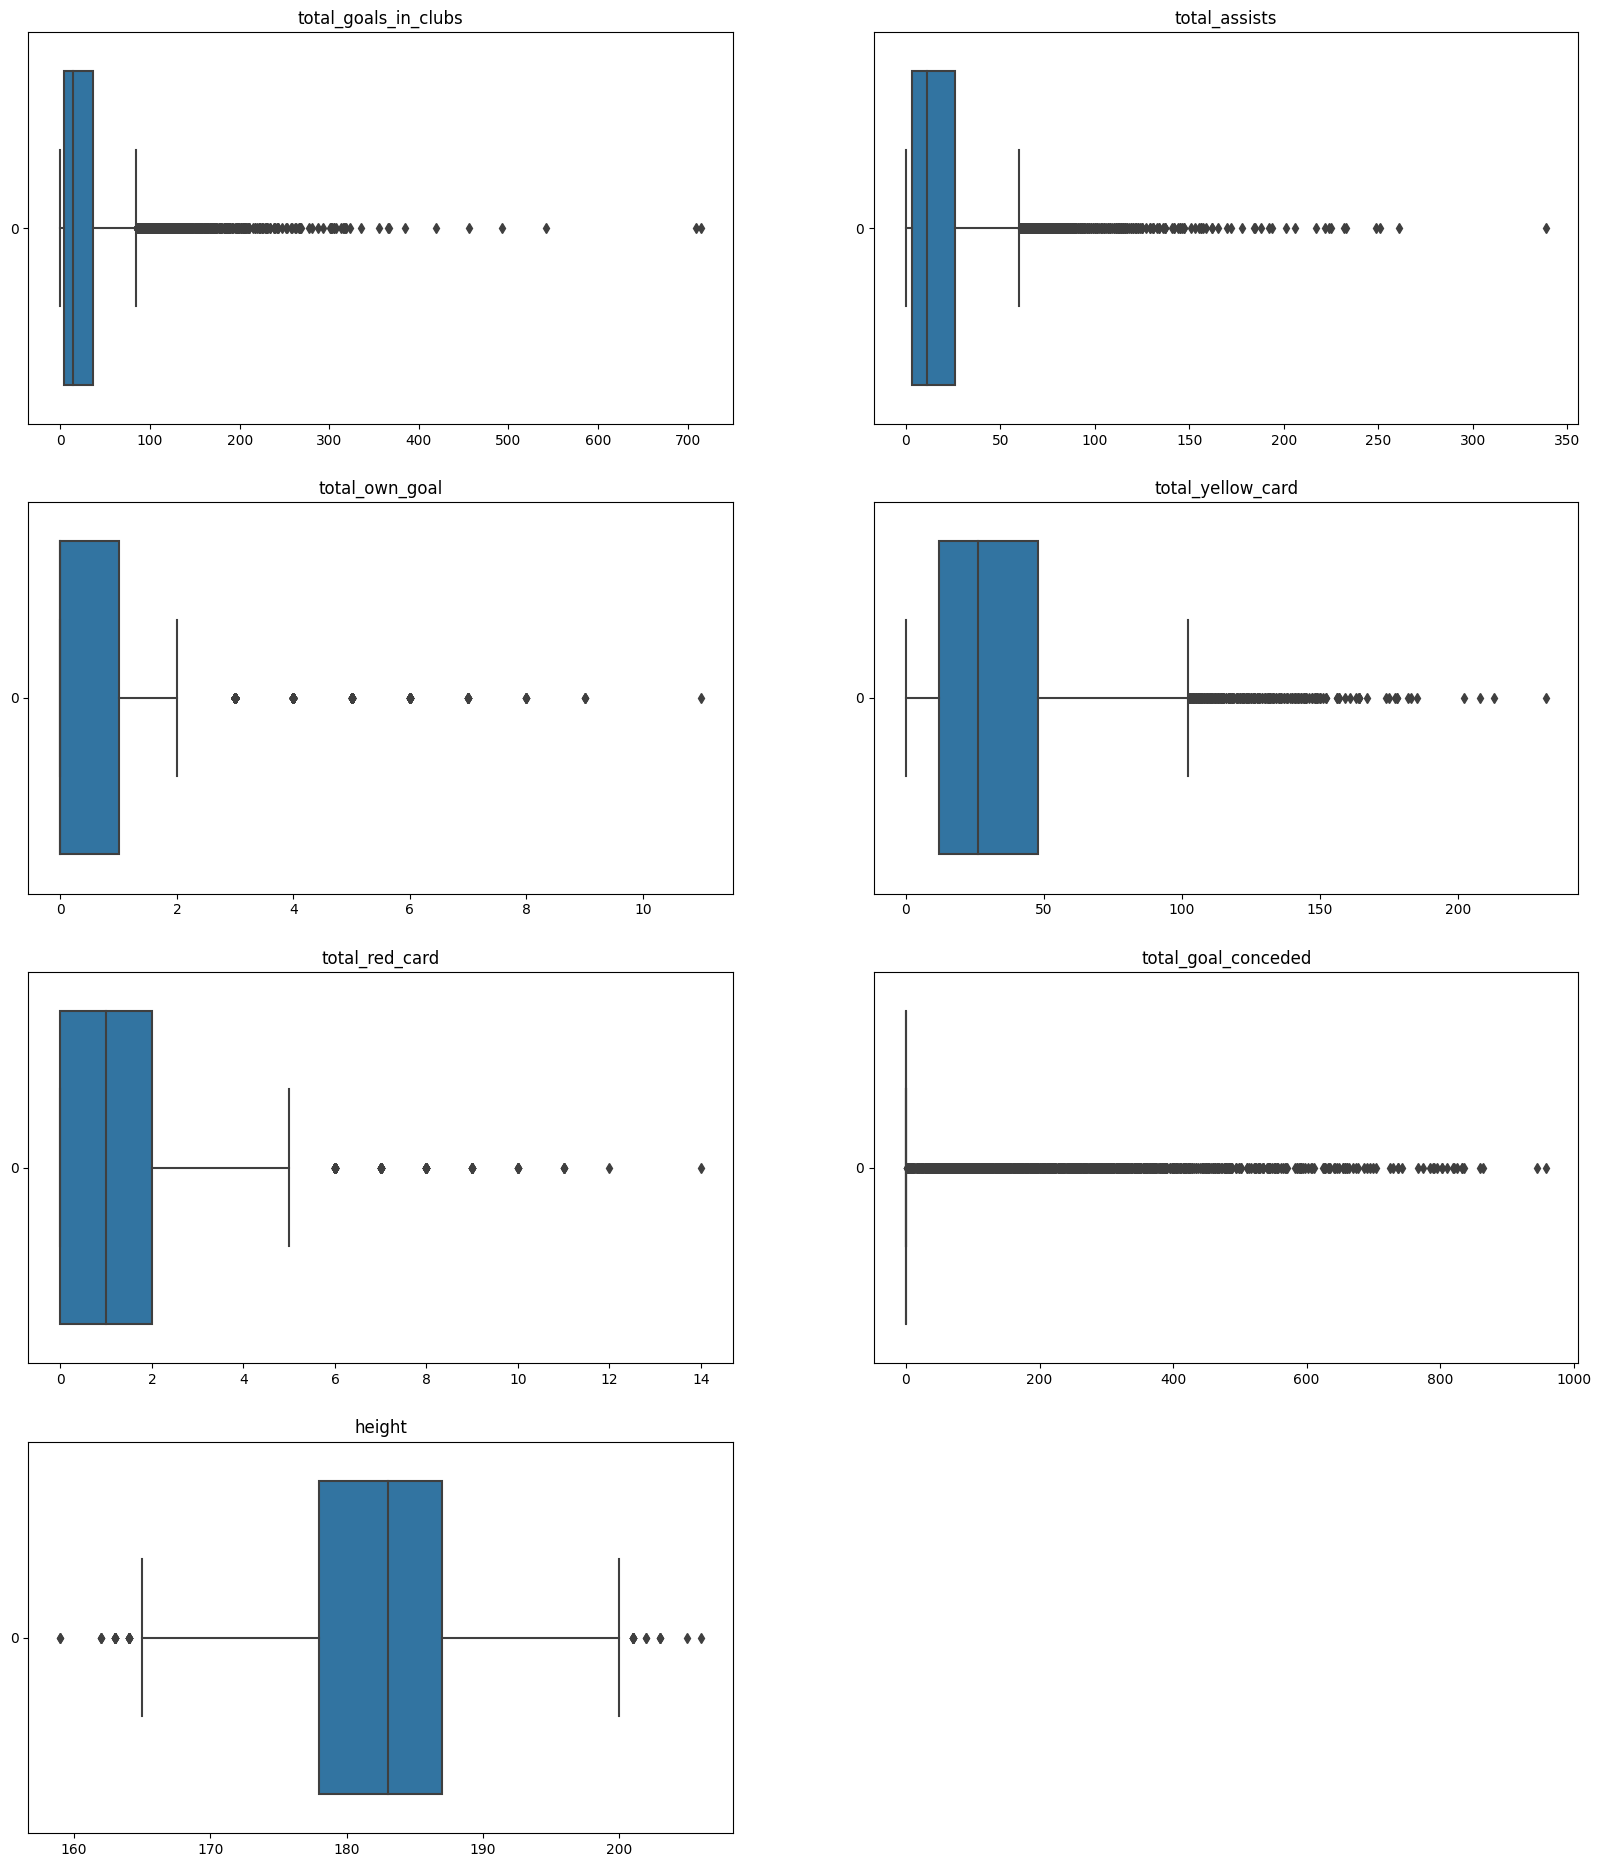

In [5]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(df['total_goals_in_clubs'],orient="horizontal")
plt.title('total_goals_in_clubs')
plt.subplot(10,2,2)
sns.boxplot(df['total_assists'],orient="horizontal")
plt.title('total_assists')
plt.subplot(10,2,3)
sns.boxplot(df['total_own_goal'],orient='horizontal')
plt.title('total_own_goal')
plt.subplot(10,2,4)
sns.boxplot(df['total_yellow_card'],orient='horizontal')
plt.title('total_yellow_card')
plt.subplot(10,2,5)
sns.boxplot(df['total_red_card'],orient='horizontal')
plt.title('total_red_card')
plt.subplot(10,2,6)
sns.boxplot(df['total_goal_conceded'],orient='horizontal')
plt.title('total_goal_conceded')
plt.subplot(10,2,7)
sns.boxplot(df['height'],orient='horizontal')
plt.title('height')

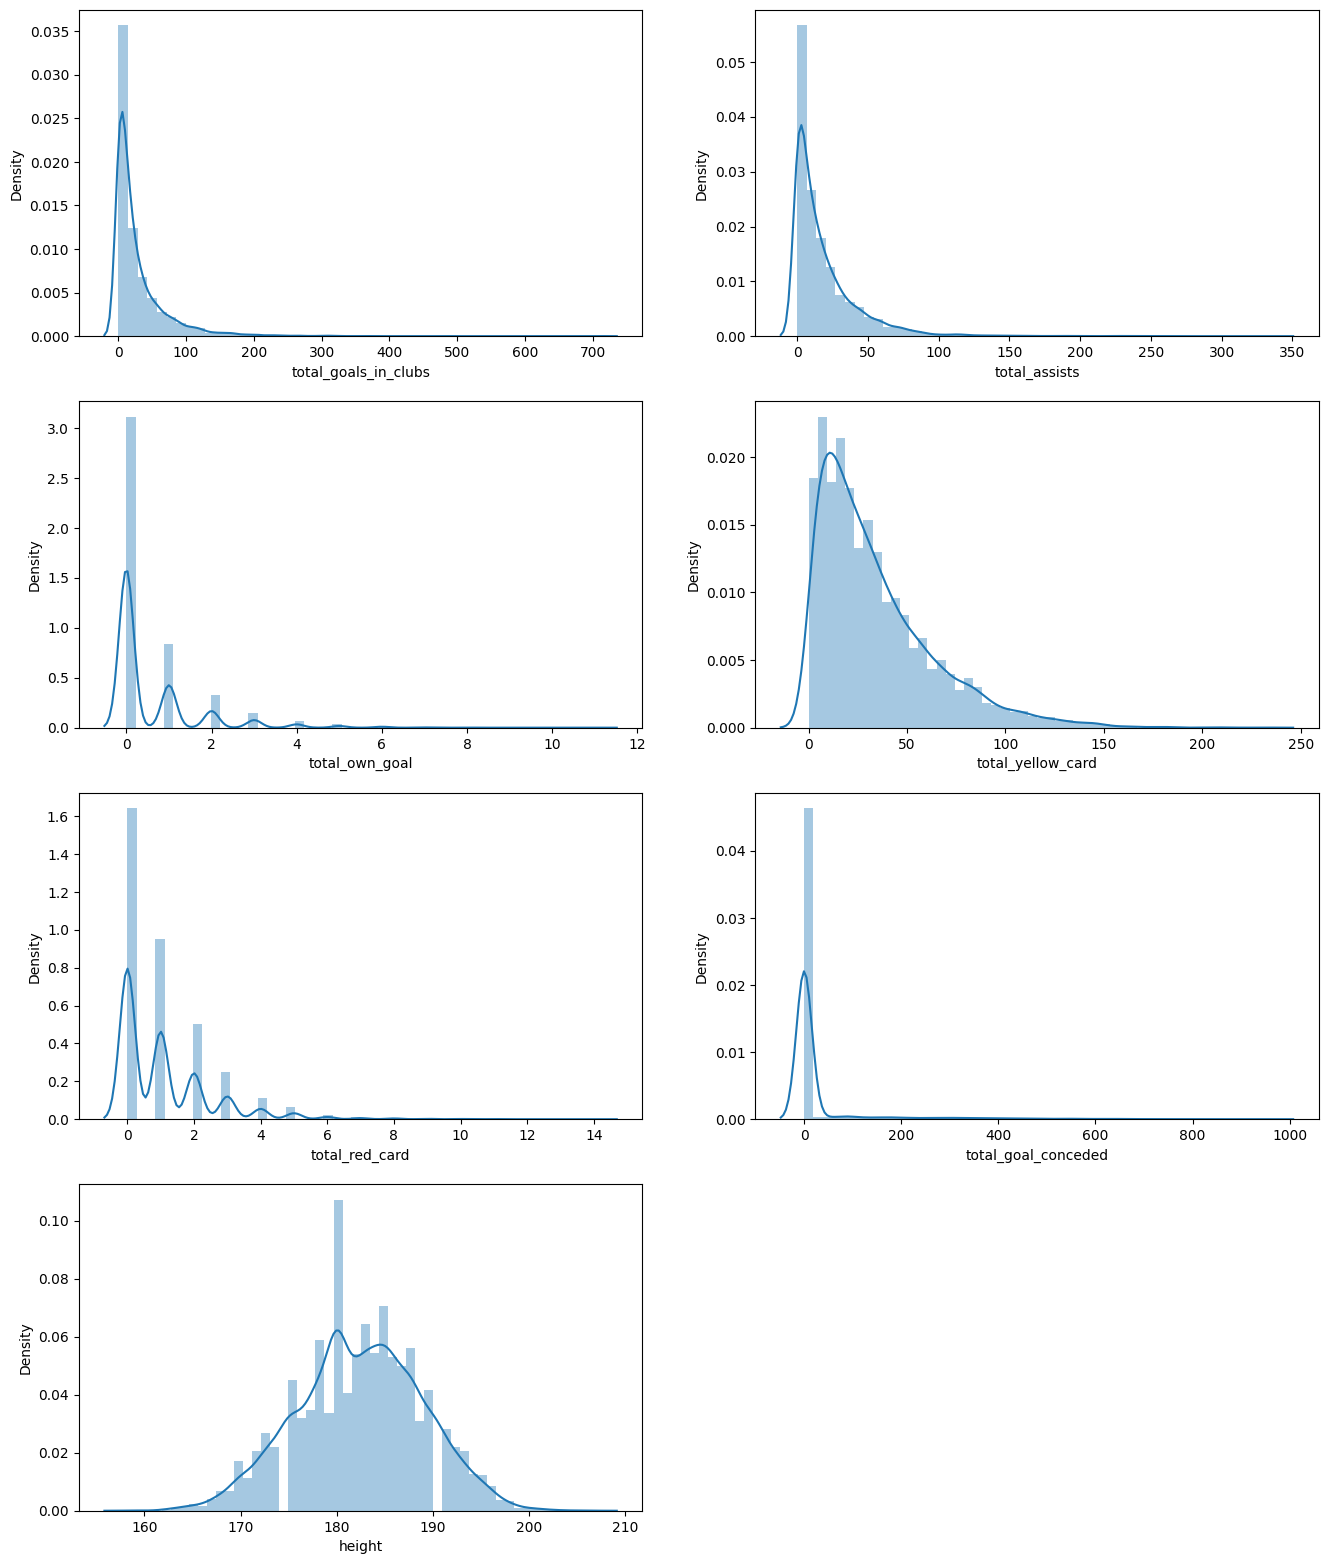

In [6]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(df['total_goals_in_clubs'])
plt.subplot(10,2,2)
sns.distplot(df['total_assists'])
plt.subplot(10,2,3)
sns.distplot(df['total_own_goal'])
plt.subplot(10,2,4)
sns.distplot(df['total_yellow_card'])
plt.subplot(10,2,5)
sns.distplot(df['total_red_card'])
plt.subplot(10,2,6)
sns.distplot(df['total_goal_conceded'])
plt.subplot(10,2,7)
sns.distplot(df['height'])
plt.show()

In [7]:
need_outlier_management = ['total_goals_in_clubs','total_assists','total_yellow_card']
for item in need_outlier_management:
    q1 = df[item].quantile(0.25)
    q3 = df[item].quantile(0.75)
    iqr = q3 - q1


    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    # replace outliers with the median value
    median = df[item].median()
    df[item] = np.where((df[item] < lower_bound), median, df[item])
    df[item] = np.where((df[item] > upper_bound), median, df[item])

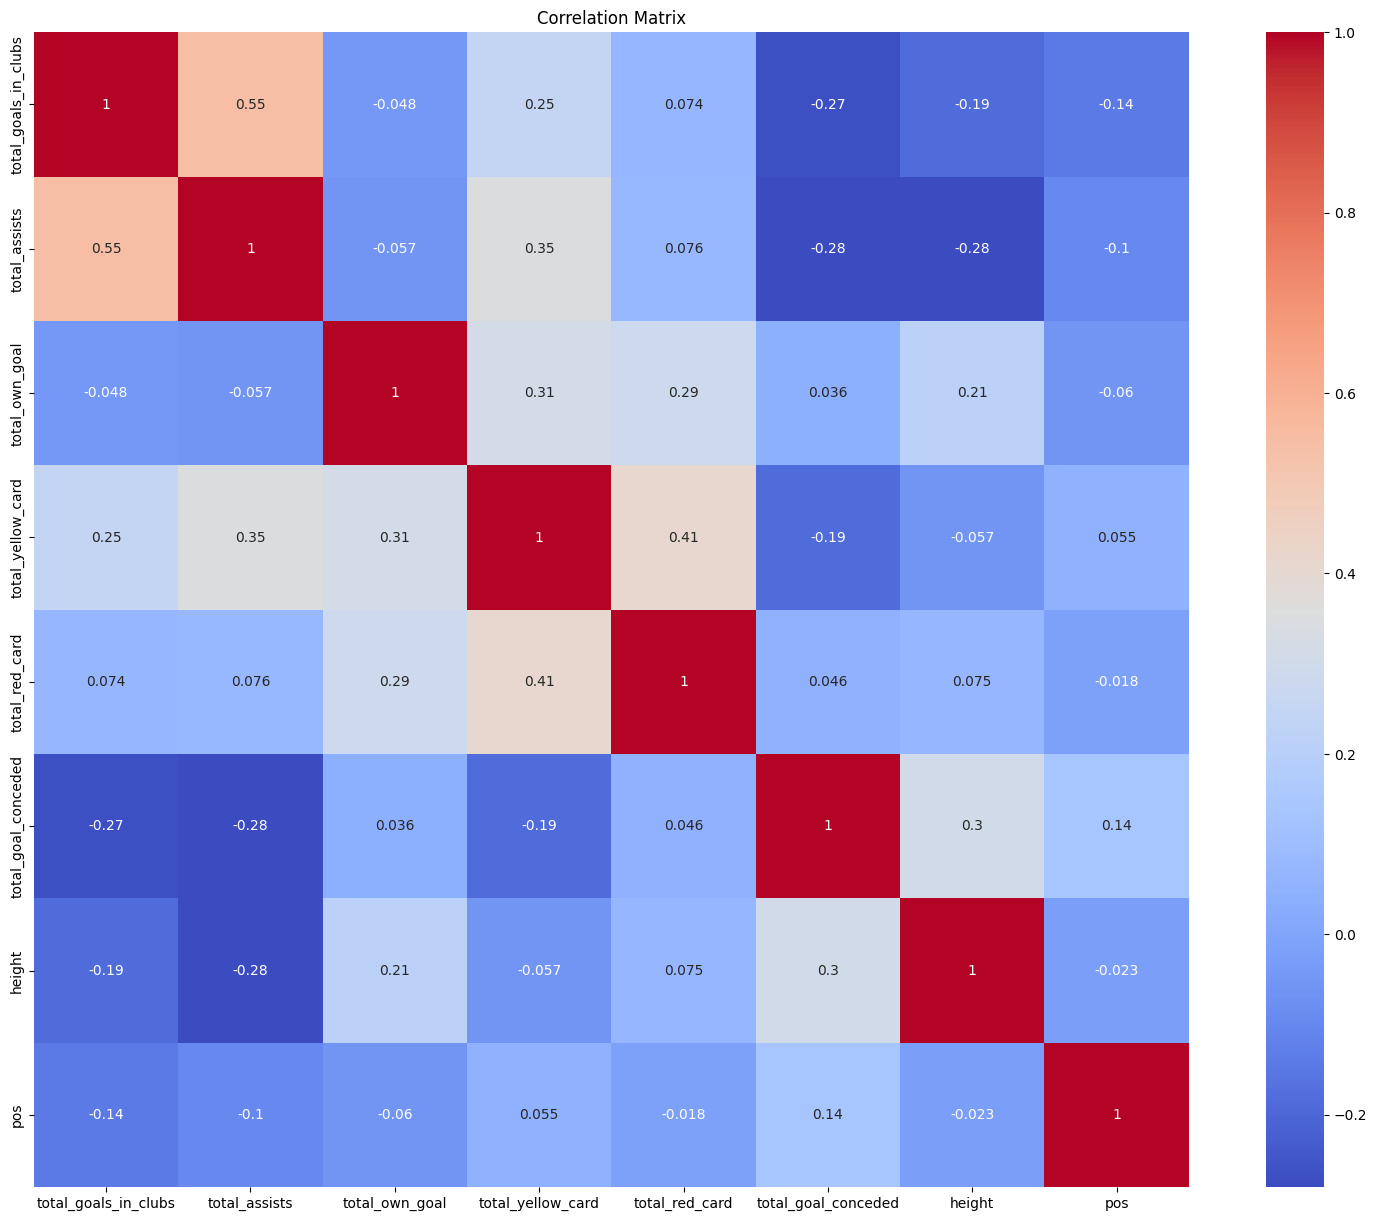

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'height')

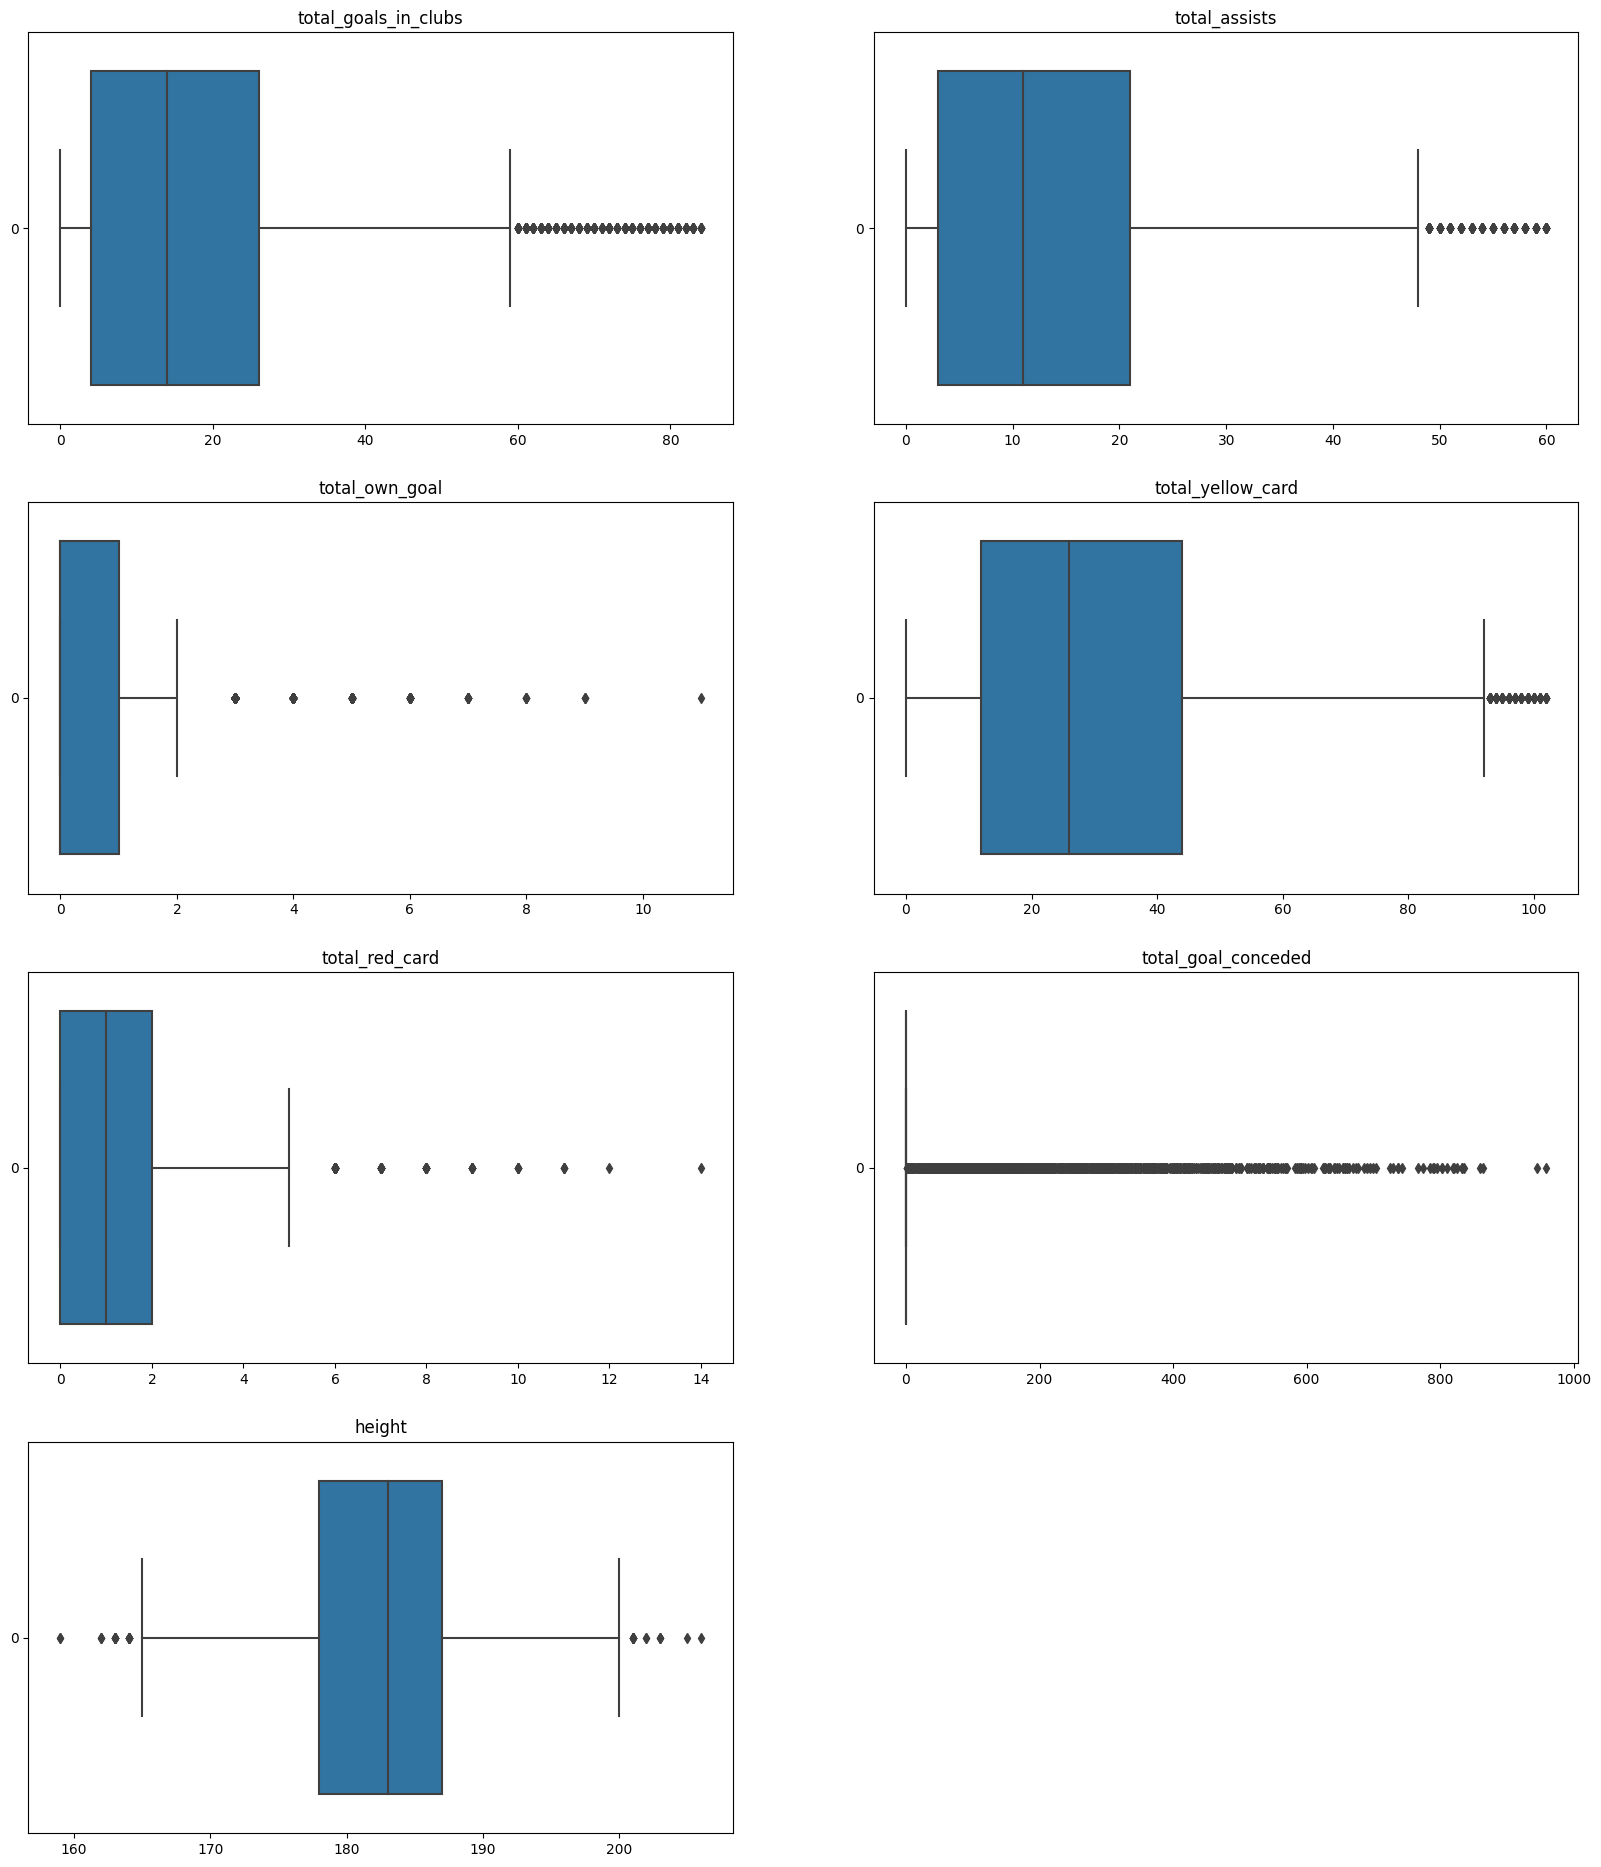

In [9]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(df['total_goals_in_clubs'],orient="horizontal")
plt.title('total_goals_in_clubs')
plt.subplot(10,2,2)
sns.boxplot(df['total_assists'],orient="horizontal")
plt.title('total_assists')
plt.subplot(10,2,3)
sns.boxplot(df['total_own_goal'],orient='horizontal')
plt.title('total_own_goal')
plt.subplot(10,2,4)
sns.boxplot(df['total_yellow_card'],orient='horizontal')
plt.title('total_yellow_card')
plt.subplot(10,2,5)
sns.boxplot(df['total_red_card'],orient='horizontal')
plt.title('total_red_card')
plt.subplot(10,2,6)
sns.boxplot(df['total_goal_conceded'],orient='horizontal')
plt.title('total_goal_conceded')
plt.subplot(10,2,7)
sns.boxplot(df['height'],orient='horizontal')
plt.title('height')

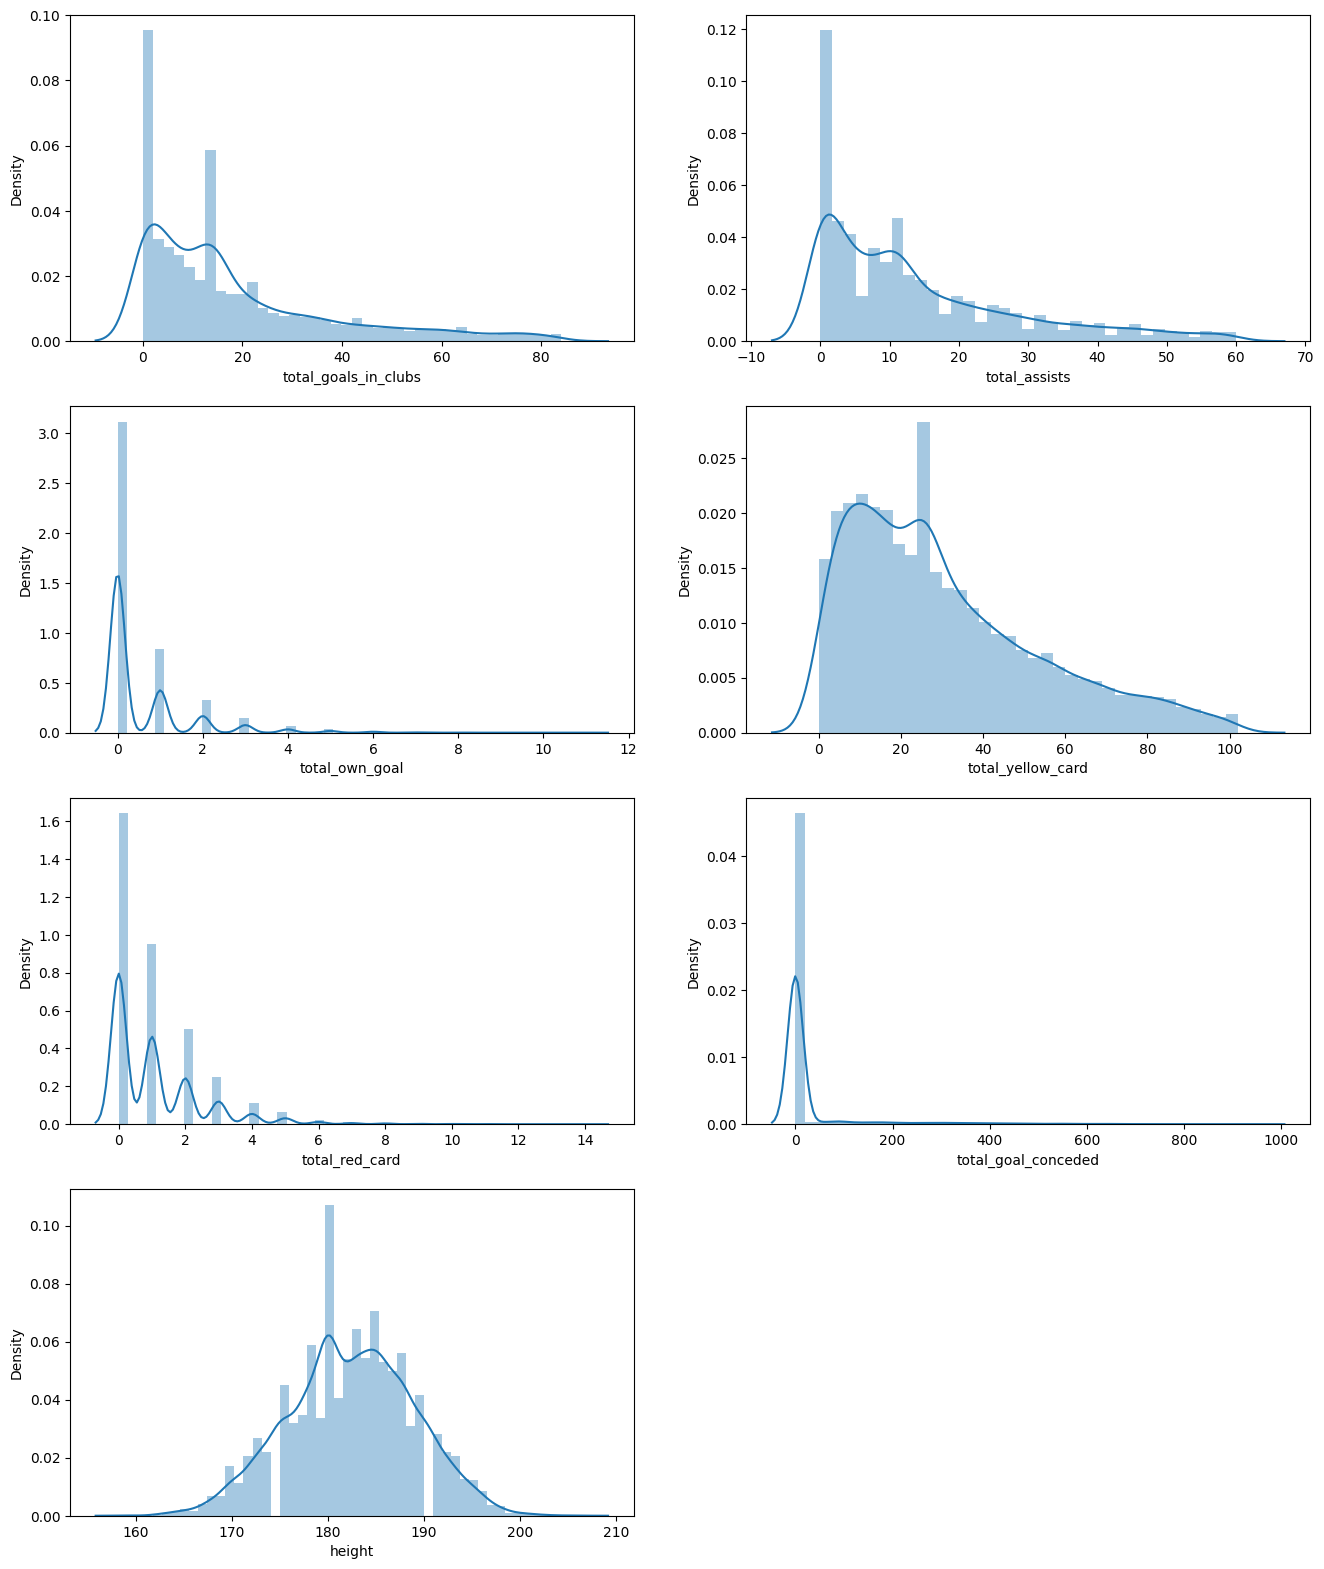

In [10]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(df['total_goals_in_clubs'])
plt.subplot(10,2,2)
sns.distplot(df['total_assists'])
plt.subplot(10,2,3)
sns.distplot(df['total_own_goal'])
plt.subplot(10,2,4)
sns.distplot(df['total_yellow_card'])
plt.subplot(10,2,5)
sns.distplot(df['total_red_card'])
plt.subplot(10,2,6)
sns.distplot(df['total_goal_conceded'])
plt.subplot(10,2,7)
sns.distplot(df['height'])
plt.show()

In [11]:
train_label = train_data['pos']
train_data = train_data.drop(columns=['pos'])
test_label = test_data['pos']
test_data = test_data.drop(columns=['pos'])
valid_label = valid_data['pos']
valid_data = valid_data.drop(columns=['pos'])

In [12]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [13]:
clf = RandomForestClassifier(random_state=42)

In [14]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_data,train_label)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [15]:
y_pred = CV_rfc.predict(valid_data)
y_train_pred = CV_rfc.predict(train_data)
print('performance on validation data:','f1_score:',f1_score(valid_label, y_pred,average='macro'))
print('performance on train data:','f1_score:',f1_score(train_label, y_train_pred,average='macro'))

performance on validation data: f1_score: 0.7780102630790823
performance on train data: f1_score: 0.8548715579557374


In [16]:
print(classification_report(valid_label, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       247
           1       0.79      0.82      0.80       310
           2       0.99      0.99      0.99       103
           3       0.56      0.52      0.54       255

    accuracy                           0.75       915
   macro avg       0.78      0.78      0.78       915
weighted avg       0.74      0.75      0.74       915



In [17]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

In [18]:
rfc1 = RandomForestClassifier(criterion='gini',max_depth= 10,max_features= 'auto', n_estimators= 200,random_state=42)
rfc1.fit(train_data,train_label)
y_pred = rfc1.predict(test_data)
print('performance on test data:',f1_score(test_label, y_pred,average='macro'))

performance on test data: 0.7571077746328716


-- Details of the acheived Decision Tree --

--Feature importances --


<Axes: >

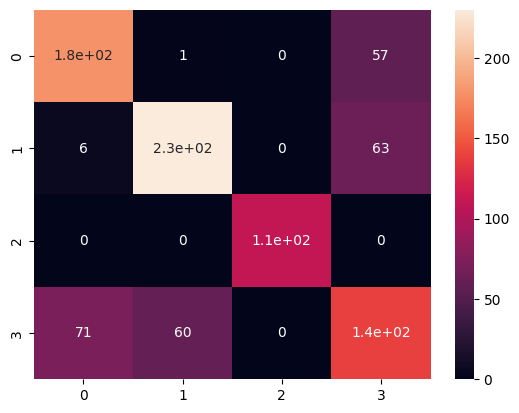

In [19]:
print('-- Details of the acheived Decision Tree --')
print('\n--Feature importances --')
sns.heatmap(confusion_matrix(test_label, y_pred), annot=True)

In [20]:
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       236
           1       0.79      0.77      0.78       299
           2       1.00      1.00      1.00       110
           3       0.53      0.51      0.52       269

    accuracy                           0.72       914
   macro avg       0.76      0.76      0.76       914
weighted avg       0.72      0.72      0.72       914

